# DS-SF-34 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.  You will summarize and present your findings and the methods you used.

In [79]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [80]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df_original = df

## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [81]:
pd.crosstab(df.prestige, df.admit, dropna = False)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [82]:
c = pd.get_dummies(df.prestige, prefix = "Prestige")

In [83]:
c

,Prestige_1.0,Prestige_2.0,Prestige_3.0,Prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


> ### Question 3.  How many of these binary variables do we need for modeling?

Answer: We only need 3 of these columns and not all 4 and the combinations of columns we can accept are the following:

| Variable_1 | Variable_2   | Variable_3 |
|------|------|------|
| Prestige_1 | Prestige_2   | Prestige_3 |
| Prestige_1 | Prestige_2   | Prestige_4 |
| Prestige_1 | Prestige_3   | Prestige_4 |
| Prestige_2 | Prestige_3   | Prestige_4 |



> ### Question 4.  Why are we doing this?

Answer: So we can assign the same weight for each category so that the machine understands that prestige equals 4  doesn't necessarily  means that much better than a prestige equal to 1 it only means that for that individual que belongs to the category 4 and not to the other ones.

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [84]:
df[c.columns] = c
df = df.drop('prestige', 1)

In [85]:
df

,admit,gre,gpa,Prestige_1.0,Prestige_2.0,Prestige_3.0,Prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620.0,4.00,0,1,0,0
396,0,560.0,3.04,0,0,1,0
397,0,460.0,2.63,0,1,0,0
398,0,700.0,3.65,0,1,0,0


## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [86]:
pd.crosstab(df['Prestige_1.0'], df.admit, dropna = False)

admit,0,1
Prestige_1.0,,
0,243,93
1,28,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [87]:
#We calculate the probability of someone that attended the most prestigious undergraduate school to be admited.
p = 33. / (28+33)
p

0.5409836065573771

In [88]:
#We calculate the odds of someone that attended the most prestigious undergraduate school to be admited.
odds_p1_1 = p / (1 - p)
odds_p1_1

1.1785714285714288

> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [89]:
#We calculate the probability of someone that did not attended the most prestigious undergraduate school to be admited.
p = 93. / (243+93)
p

0.2767857142857143

In [90]:
#We calculate the odds of someone that did not attended the most prestigious undergraduate school to be admited.
odds_p1_0 = p / (1 - p)
odds_p1_0

0.3827160493827161

> ### Question 9.  Finally, what's the odds ratio?

In [91]:
odds_p1_1/odds_p1_0

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

Answer: TODO

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [92]:
pd.crosstab(df['Prestige_4.0'], df.admit, dropna = False)

admit,0,1
Prestige_4.0,,
0,216,114
1,55,12


In [93]:
#We calculate the probability of someone that attended the least prestigious undergraduate school to be admited.
p = 12. / (55+12)

#We calculate the odds of someone that attended the least prestigious undergraduate school to be admited.
odds_p4_1 = p / (1 - p)

#We calculate the probability of someone that did not attended the least prestigious undergraduate school to be admited.
p = 114. / (114+216)

#We calculate the odds of someone that did not attended the least prestigious undergraduate school to be admited.
odds_p4_0 = p / (1 - p)

#Odds Ratio
odds_p4_0/odds_p4_1

2.418981481481482

Answer: TODO

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [94]:
model_admit = smf.Logit(df.admit,df[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']]).fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


> ### Question 13.  Print the model's summary results.

In [95]:
model_admit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Jun 2017   Pseudo R-squ.:                 0.05722
Time:                        14:29:10   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
Prestige_2.0    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
Prestige_3.0    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
Prestige_4.0    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
================================================================================
"""

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [96]:
params = model_admit.params
conf = model_admit.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           0.999320  1.003420  1.001368
gpa           0.598303  1.282800  0.876073
Prestige_2.0  0.212826  0.694082  0.384342
Prestige_3.0  0.112055  0.412207  0.214918
Prestige_4.0  0.070176  0.338540  0.154135


> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

Answer: TODO

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: TODO

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [97]:
d = {'gre' : pd.Series([800., 800., 800., 800.]),
     'gpa' : pd.Series([4., 4., 4., 4. ]),
     'Prestige_2.0' : pd.Series([1., 0., 0., 0.]),
     'Prestige_3.0' : pd.Series([0., 1., 0., 0.]),
     'Prestige_4.0' : pd.Series([0., 0., 1., 0.])}

df_pred = pd.DataFrame(d)
df_pred

,Prestige_2.0,Prestige_3.0,Prestige_4.0,gpa,gre
0,1.0,0.0,0.0,4.0,800.0
1,0.0,1.0,0.0,4.0,800.0
2,0.0,0.0,1.0,4.0,800.0
3,0.0,0.0,0.0,4.0,800.0


In [98]:
df_pred['admit_pred_sklearn'] = model_admit.predict(df_pred[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']])
df_pred

,Prestige_2.0,Prestige_3.0,Prestige_4.0,gpa,gre,admit_pred_sklearn
0,1.0,0.0,0.0,4.0,800.0,0.403204
1,0.0,1.0,0.0,4.0,800.0,0.274202
2,0.0,0.0,1.0,4.0,800.0,0.213184
3,0.0,0.0,0.0,4.0,800.0,0.637399


Answer: We got that if the gpa is equal to 4.0 and the gre is while more higher the prestige is more likely to be admited.

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [99]:
modsk_admit = linear_model.LogisticRegression().\
    fit(df[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']], df.admit)

print modsk_admit.coef_
print modsk_admit.intercept_

[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]
[-1.81701706]


> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [100]:
print np.exp(modsk_admit.coef_)

[[ 1.00178657  1.26149128  0.546908    0.3097005   0.25225925]]


In [101]:
print np.exp(model_admit.params)

gre             1.001368
gpa             0.876073
Prestige_2.0    0.384342
Prestige_3.0    0.214918
Prestige_4.0    0.154135
dtype: float64


Answer: TODO

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [102]:
df_pred['admit_pred_sklearn'] = modsk_admit.predict(df_pred[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']])
df_pred

,Prestige_2.0,Prestige_3.0,Prestige_4.0,gpa,gre,admit_pred_sklearn
0,1.0,0.0,0.0,4.0,800.0,0
1,0.0,1.0,0.0,4.0,800.0,0
2,0.0,0.0,1.0,4.0,800.0,0
3,0.0,0.0,0.0,4.0,800.0,1


Answer: TODO

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

>*Given various features, the aim is to build a predictive model to determine the admision status for people. The admit status are 0 for not admitted and 1 for admitted.*

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 7 columns):
admit           397 non-null int64
gre             397 non-null float64
gpa             397 non-null float64
Prestige_1.0    397 non-null uint8
Prestige_2.0    397 non-null uint8
Prestige_3.0    397 non-null uint8
Prestige_4.0    397 non-null uint8
dtypes: float64(2), int64(1), uint8(4)
memory usage: 14.0 KB


Answer: As we can see in the above table we have non missing values for each column. Though we did a one hot encoding for the Prestige column.

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

In [104]:
color = df.admit.map({0: 'red', 1: 'green'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D439E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012ED7780>]], dtype=object)

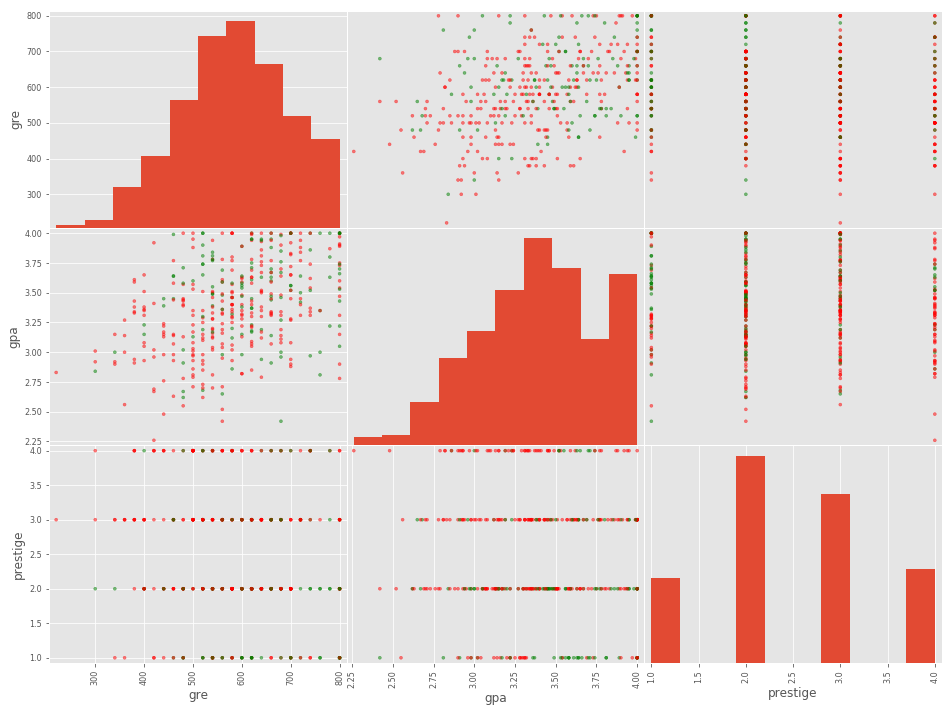

In [105]:
pd.tools.plotting.scatter_matrix(df_original[ ['gre', 'gpa', 'prestige'] ], c = color, figsize = (16, 12))

Answer: TODO

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: We use the fit the variables gre, gpa and the dummies made for prestige to fit into a logistic regression model without using the intercept. These were the following coefficients:

In [106]:
model_admit.params

gre             0.001367
gpa            -0.132306
Prestige_2.0   -0.956223
Prestige_3.0   -1.537500
Prestige_4.0   -1.869928
dtype: float64

> ## Question 25.  Results
>
> Write up your results.

In [107]:
modsk_admit.score(df[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']], df.admit)

0.70528967254408059

Answer: It seems that the model has 70% of accuracy but using statsmodel summary table it gives as that gre and gpa do not contribute significantly to the prediction model. So we should propuse a new model.

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

In [114]:
c_hat = modsk_admit.predict(df[['gre','gpa','Prestige_2.0','Prestige_3.0','Prestige_4.0']])
c = df.admit

In [116]:
pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,257,103
1,14,23


Answer: The model is actually good at predicting if it will not be admited but fails  drastically when the individual is admitted.

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: First of all determine if it is an unbalanced dataset and if it needs to be over or under sample than continue with the lasso regularization to understand what variables are we willing to drop because it doesn't contribute to the predictive model at last post my results.